Dataset: https://universe.roboflow.com/yolov7test-u13vc/weapon-detection-m7qso/dataset/16

In [ ]:
# github repo link : https://github.com/deeptiagrawal19/visual-ai-hack.git

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fiftyone
import fiftyone as fo

In [ ]:
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset("quickstart")

Dataset already downloaded


INFO:fiftyone.zoo.datasets:Dataset already downloaded


Loading 'quickstart'


INFO:fiftyone.zoo.datasets:Loading 'quickstart'


 100% |█████████████████| 200/200 [8.0s elapsed, 0s remaining, 35.1 samples/s]       


INFO:eta.core.utils: 100% |█████████████████| 200/200 [8.0s elapsed, 0s remaining, 35.1 samples/s]       


Dataset 'quickstart' created


INFO:fiftyone.zoo.datasets:Dataset 'quickstart' created


In [ ]:
print(dataset)

Name:        quickstart
Media type:  image
Num samples: 200
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:       fiftyone.core.fields.FloatField
    predictions:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AFWior8ha5uI1aEzAInN")
project = rf.workspace("yolov7test-u13vc").project("weapon-detection-m7qso")
version = project.version(16)
dataset = version.download("yolov7")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import zipfile

In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
zip_path = '/content/roboflow.zip'  # Replace with the actual path to your ZIP file
# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all image files in the ZIP archive
    image_files = [f for f in zip_ref.namelist() if f.endswith(('.jpg', '.png', '.jpeg'))]
    print("Image files in the ZIP archive:", image_files)

    # Read and display the first image
    with zip_ref.open(image_files[0]) as img_file:
        # Using PIL to open the image
        img = Image.open(img_file)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Alternatively, using OpenCV
        img_bytes = img_file.read()
        img_np = cv2.imdecode(np.frombuffer(img_bytes, np.uint8), cv2.IMREAD_COLOR)
        plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

BadZipFile: File is not a zip file

In [ ]:
import os

zip_path = "/content/weapon-detection-16/roboflow.zip"

# Check if the file exists
if os.path.exists(zip_path):
    print("File found.")
    # Check if it's a valid ZIP file
    if zip_path.endswith(".zip"):
        print("The file has a .zip extension.")
    else:
        print("Warning: The file does not have a .zip extension.")
else:
    print("Error: File not found.")


Error: File not found.


In [ ]:
import zipfile
import os

zip_path = '/content/roboflow.zip'  # Replace with the actual path

# Check if the file exists
if not os.path.exists(zip_path):
    print(f"Error: File not found at {zip_path}")
else:
    print(f"File found: {zip_path}")

    try:
        # Open the ZIP file
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            print("ZIP file opened successfully!")

            # List all image files in the ZIP archive
            image_files = [f for f in zip_ref.namelist() if f.endswith(('.jpg', '.png', '.jpeg'))]
            print("Image files in the ZIP archive:", image_files)

            # Read and display the first image
            if image_files:
                with zip_ref.open(image_files[0]) as img_file:
                    from PIL import Image
                    import matplotlib.pyplot as plt

                    # Using PIL to open the image
                    img = Image.open(img_file)
                    plt.imshow(img)
                    plt.axis('off')
                    plt.show()
            else:
                print("No image files found in the ZIP archive.")
    except zipfile.BadZipFile:
        print("Error: The file is not a valid ZIP file or is corrupted.")
    except Exception as e:
        print(f"An error occurred: {e}")

File found: /content/roboflow.zip
Error: The file is not a valid ZIP file or is corrupted.


In [ ]:
import numpy as np
import cv2
import imutils
import datetime
from google.colab.patches import cv2_imshow  # Use Colab's cv2_imshow for displaying images

# Load the gun detection cascade classifier
gun_cascade = cv2.CascadeClassifier('cascade.xml')

# Initialize the camera (use 0 for the default webcam)
camera = cv2.VideoCapture(0)

# Variables for motion detection
firstFrame = None
gun_exist = False

while True:
    ret, frame = camera.read()
    if frame is None:
        break

    # Resize the frame for faster processing
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect guns in the frame
    gun = gun_cascade.detectMultiScale(gray, 1.3, 20, minSize=(100, 100))

    # If guns are detected, draw bounding boxes
    if len(gun) > 0:
        gun_exist = True
        for (x, y, w, h) in gun:
            frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            roi_gray = gray[y:y + h, x:x + w]
            roi_color = frame[y:y + h, x:x + w]

    # Display the timestamp on the frame
    cv2.putText(frame, datetime.datetime.now().strftime("%A %d %B %Y %I:%M:%S %p"),
                (10, frame.shape[0] - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.35, (0, 0, 255), 1)

    # Show the frame using cv2_imshow (Colab-specific)
    cv2_imshow(frame)

    # If a gun is detected, break the loop
    if gun_exist:
        print("Guns detected")
        break

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close any open windows
camera.release()

In [ ]:
!git clone https://github.com/ari-dasci/OD-WeaponDetection.git

Cloning into 'OD-WeaponDetection'...
remote: Enumerating objects: 50755, done.
remote: Counting objects: 100% (11673/11673), done.
remote: Compressing objects: 100% (10232/10232), done.
remote: Total 50755 (delta 11), reused 11673 (delta 11), pack-reused 39082 (from 1)
Receiving objects: 100% (50755/50755), 2.26 GiB | 29.46 MiB/s, done.
Resolving deltas: 100% (10978/10978), done.
Updating files: 100% (63128/63128), done.


In [72]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

photo_filename = take_photo()
print(f"Photo saved as {photo_filename}")

<IPython.core.display.Javascript object>

Photo saved as photo.jpg


Cascade classifier loaded successfully.
No gun detected in the image.


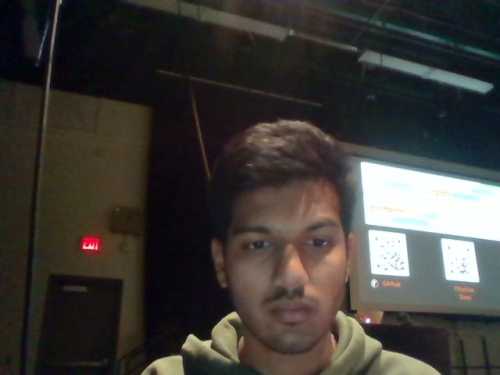

In [73]:
from google.colab.patches import cv2_imshow

# Load the cascade classifier
gun_cascade = cv2.CascadeClassifier('cascade.xml')
if gun_cascade.empty():
    print("Error: Could not load cascade classifier.")
else:
    print("Cascade classifier loaded successfully.")

# Load the captured image
frame = cv2.imread(photo_filename)
if frame is None:
    print("Error: Could not load image.")
else:
    # Resize the frame for faster processing
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect guns in the frame
    gun = gun_cascade.detectMultiScale(gray, 1.3, 20, minSize=(100, 100))

    # If guns are detected, draw bounding boxes
    if len(gun) > 0:
        for (x, y, w, h) in gun:
            frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        print("Gun detected in the image.")
    else:
        print("No gun detected in the image.")

    # Display the image
    cv2_imshow(frame)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# Data: https://www.kaggle.com/datasets/muhammedaslan00/weapon-detection-datasett/data

import os
for dirname, _, filenames in os.walk('/kaggle/input/weapon-detection-datasett'):
    for filename in filenames:
        print(os.path.join(dirname, filename))